## EDSML group project

## Seismic imaging revision assignment


### Assignment set: 11 am 18th Jan
### Assignment to be submitted: 2pm 19th Jan


### **Format**: written answers to questions in a Jupyter notebook (please also include figures from the lecture notes or other referenced sources), coding to view seismic and calculate attributes

The purpose of this exercise is to provide you with a structured way to consolidate your understanding of seismic imaging. We have been through a lot of content quickly in 2.5 days and this exercise offers you an opportunity to think more deeply about these concepts to help you prepare for the assessed quiz next week (on Fri 26th Jan). You could rush through the activity quickly in a couple of hours just copying and pasting from the notes- but I encourage you to use this time to really make sure you understand things. Talk things through with your group as well as the GTAs who will host drop-in sessions. I will provide you with feedback on your submissions by Tuesday 23rd Jan, to help you prepare for the assessed quiz. At the bottom of this notebook you will find three example questions to show you the format of the assessed quiz. Please answer these questions and you will receive feedback on these too.

#### Submission process:

As part of your group project, it's crucial that we maintain an organized and efficient submission process. To ensure this, please adhere to the following guidelines:

- One Submission Per Group: Each group is required to submit only one answer. It's important that you collaborate and consolidate your work within your group to finalize a single, representative notebook.

- Please include your group name, your answers in th email and send it to:

rebecca.bell@imperial.ac.uk

psalah@imperial.ac.uk

- Feedback Process: After the submission deadline, Becky will review the submitted notebooks and provide feedback. It's essential to submit by the deadline to receive timely feedback.



#### Ancillary files

If your code or answers depend on additional files, such as images, photos, or small data files, then make sure to include these in your submission as well.

## -Premise-

You work for a company who have collected a 3D seismic reflection dataset in two-way travel time, using an airgun source in an area where companies are interested in exploring for geothermal energy production. You have a potential buyer for the seismic data but they have a few questions and would like to learn more about how they can use Python to view and work with the data and they want to see some data examples and understand the future potential.

Please address their questions in the notebook below. I have provided some guidance on how much detail should be in these responses in terms of a max word limit (this is a maximum NOT a target. You can answer these questions well with far fewer words). The questions specify whether I am expecting text and figures, code or both text and code to answer the question.

Feel free to recycle code from exercise 3 and 4 (making sure you understand it!) and you can also explore additional libraries if you so wish (but not required). 

**The exercise will require you to load SEG-Y file Thebe_small2.sgy which you can find in the 'data' folder here**- https://imperiallondon-my.sharepoint.com/personal/psalah_ic_ac_uk/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fpsalah%5Fic%5Fac%5Fuk%2FDocuments%2Fdata%2DBecky%2Dexercises&ga=1  

### Name of your company (be inventive!):

##### Pingers and sons ltd.

### Team members names and email addresses:

Benedict Grey, bpg23@ic.ac.uk
Daniel Seal, ds423@ic.ac.uk
Robert Smith, rs4623@ic.ac.uk
Nina Baumann, nina.baumann23@imperial.ac.uk
Sarah Nesti, sarah.nesti22@imperial.ac.uk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
import scipy.ndimage
import math
import scipy
from typing import Callable

In [2]:
base_segy = segyio.open('../../data/Thebe_small2', ignore_geometry=False) 
print(segyio.tools.wrap(base_segy.text[0]))

C 1 SEGY OUTPUT FROM Petrel 2017.1 Thursday, November 18 2021 12:25:33
C 2 Name: FullStack_06-34degree Realized 1 Crop 1 Type: 3D seismic          C 3
C 4 First inline: 1556   Last inline: 2056
C 5 First xline:  1066   Last xline:  2099
C 6 CRS: Undefined
C 7 X min: 723285.20 max: 740842.39 delta: 17557.19
C 8 Y min: 7843915.02 max: 7861339.03 delta: 17424.01
C 9 Time min: -2170.50 max: -1474.50 delta: 696.00
C10 Lat min: - max: - delta: -
C11 Long min: - max: - delta: -
C12 Trace min: -2169.00 max: -1476.00 delta: 693.00
C13 Seismic (template) min: -9375.49 max: 12558.00 delta: 21933.49
C14 Amplitude (data) min: -9375.49 max: 12558.00 delta: 21933.49
C15 Trace sample format: IEEE floating point
C16 Coordinate scale factor: 100.00000
C17
C18 Binary header locations:
C19 Sample interval             : bytes 17-18
C20 Number of samples per trace : bytes 21-22
C21 Trace date format           : bytes 25-26
C22
C23 Trace header locations:
C24 Inline number               : bytes 5-8
C25 Xline

In [3]:
depth = base_segy.samples
inlines = base_segy.ilines
xlines = base_segy.xlines
data = segyio.tools.cube(base_segy)
print(f'inline dim = {inlines.shape[0]}, xline dim = {xlines.shape[0]}, depth/time dim = {depth.shape[0]}')

inline dim = 501, xline dim = 1034, depth/time dim = 232


In [4]:
data.shape

(501, 1034, 232)

In [5]:
"""
First inline: 1556   Last inline: 2056
First xline:  1066   Last xline:  2099
Time min: -2170.50 max: -1474.50 delta: 696.00
"""
inline_start = 1556
xline_start = 1066

In [6]:
dt = 696 / depth.shape[0]
t0 = 1474.50
t_end = 2170.50

In [7]:
depth.shape[0] * 3

696

In [92]:

from typing import Literal

def plot_seismic_slice(
        data: np.ndarray, 
        dimension: Literal["inline", "xline", 'depth', 'time'], 
        slice_idx: int, 
        ax: plt.Axes | None = None,
) -> None:
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    
    match dimension:
        case "inline":
            slice = data[slice_idx, :, :].T
        case "xline":
            slice = data[:, slice_idx, :].T
        case "time" | "depth":
            slice = data[:, :, slice_idx].T
        case _:
            raise ValueError("Dimension not known.")
    
    mean, std = slice.mean(), slice.std()
    img = ax.imshow(slice, cmap='seismic', vmin=mean-std, vmax=mean+std)
    ax.set_title(f"{dimension} view at index {slice_idx}")
    
    cbar = plt.colorbar(img, shrink=0.5)
    cbar.set_label('Reflected amplitude', rotation=270, labelpad=15)
    

**Question 1**: Thank you for approaching us with your 3D seismic dataset. Could you explain to us briefly, using any figures you wish, what seismic reflection data is and why it might be useful for our company finding sites for geothermal energy production? (text,figures)(max. 300 words)

#### Answer 1: Seismic data

* Seismic reflection data is a way of imaging the earth subsurface.
* Using reflections of emitted seismic waves of different frequencies we can image layers of the subsurface, inferring geological features in the process.
* A stronger reflection equates to a higher acoustic impedance contrast, in laymans terms this means we are picking up a boundary between different subsurface layers. 
* This material difference more specifically means that the reflection coefficient (p-wave velocity * density) is very different between two adjacent layers, for example sedimentary limestone and igneous granite.  
* Signals will travel faster in low porosity surfaces and slower in high porous surfaces. The behaviour of speed is proportional to the density of the surface (high density = low porosity) as shown in the nafe-drake curve and the Garner relationship (p = 0.31v^0.25).
* Seismic data can be interpreted in order to understand the geological composition and properties of the subsurface, and subsequently identify any features.
* For example, you can use the data to help identify where geothermal reservoirs may be located.
* In the vertical cross-section plotted below, we can see many offsets between the continuous layers. These discontinuities indicate the existence of faults (possibly caused by shifting tectonics). 
* These faults are key for detecting escaping geothermal energy from the core of the earth.
 

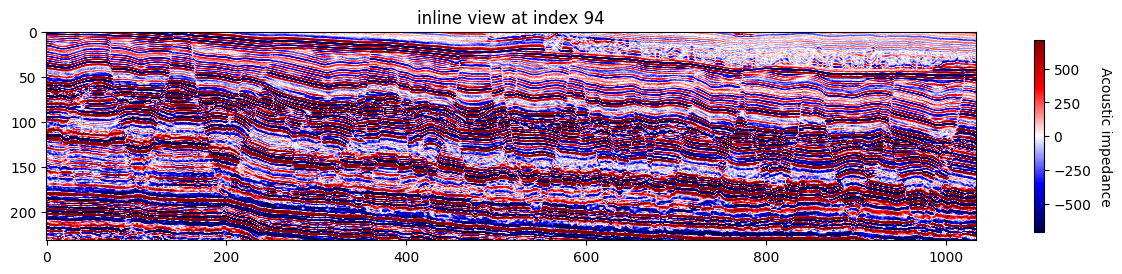

In [9]:
plot_seismic_slice(data, "inline", slice_idx=94)

**Question 2**: How does an airgun source differ to a sparker source? We are interested in imaging under the seabed to depths of >1 km, ideally down to 5 km. Would airgun or sparker data be better for us? Are there any environmental impacts of these methods and how are they mitigated? (text,figures) (max. 300 words)

#### Answer 2: Airgun vs sparker

Air guns and sparkers are both marine types of seismic sources. Air guns produce a low frequency (long wavelength) seismic wave, whereas sparkers use a much higher frequency wave. This allows airguns to image much deeper into the earths surface (up to 15 km), whereas sparkers can only image to depths of around 2km. However, due to their higher frequency sparkers can produce higher resolution seismic data, allowing more detailed information at a smaller scale.

For imaging depths from 1km up to 5km, airguns would be the better option, as sparkers can only image to depths of around 2km.

There are some negative environmental impacts of using airguns, mainly their effects on any animals/wildlife that could be in the area of the airguns. They could either cause physical damage to marine animals or interfere with their own mechanisms for communication and location, possibly and causing detrimental effects to their behaviour. However, a lot of the risks can be mitigated by trying to ensure that no animals are in close-proximity to the air guns, by using spotters, as well as involving marine biologists to help understand their locations. 

**Question 3**: Could you explain to us what is the SEGY data format and provide us with a commented demonstration of how we can load SEGY data in Python? What are the key issues associated with loading SEGY data in Python? What are the benefits of using Python over other software? (text, code, figures) (max. 300 words)


#### Answer 3: SEGY format explained
 
- The **SEGY** data format was developed by the Society of Exploration Geophysicists (SEG). It is a ~ old file format that was created to read and write data to tapes and its not very efficient. The .SEGY file contains acquisition, processing and geometry information. The data is in the form of traces, where each trace corresponds to a stack of CMP gathers (for a trace).
 
```
import segyio
file = segyio.open('<filenameDIR>', ignore_geometry= False)
```
 
#### Key Issues
* Header Interpretation, Misinterpreting headers can lead to incorrect data processing
* Data Volume
* Data loading problems will occur if the data is not a perfect cube and inline/xline
spacing not regular
 
#### Benefits of using python 
* Open Source
* Versatile and transparent 
* Integration with other scientific computing tools and libraries
* Python is able to perform actions that would require multiple, independent softwares to achieve. Each of these softwares would require their own training, licenses, cost and transparency.

**Question 4**: Please could you present to us some examples of the data from inline 1650 and xline 1600 and time slice 1800 ms. Can you describe what the data looks like (e.g. do you see high/low amplitude reflections? Are the reflections continuous or chaotic?) and identify one obvious geological feature that you can see in xline 1600? (text, code,figures) (max. 300 words)

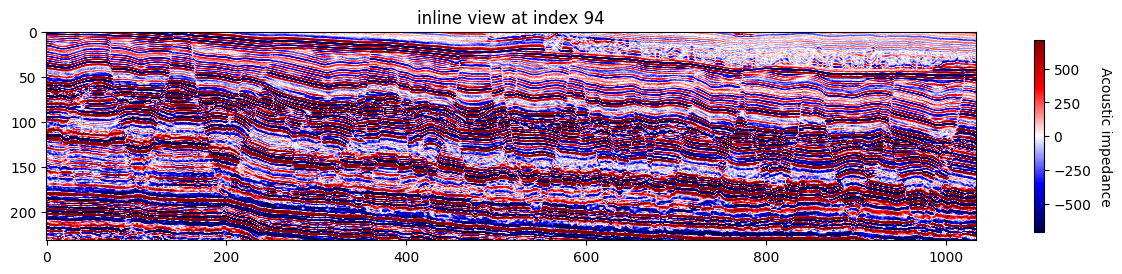

In [10]:
inline_idx = 1650 - inline_start
plot_seismic_slice(data, "inline", inline_idx)

Observations:
* We can see vertical aggredations interrupted by numerous offsets.
* The range of reflected amplitudes are normally distributed, with a range between 500 and -500.
* The reflections, although non-continuous, do not appear to be chaotic. Considering the absence of faults, the vertical aggredations would be continuous and smooth.

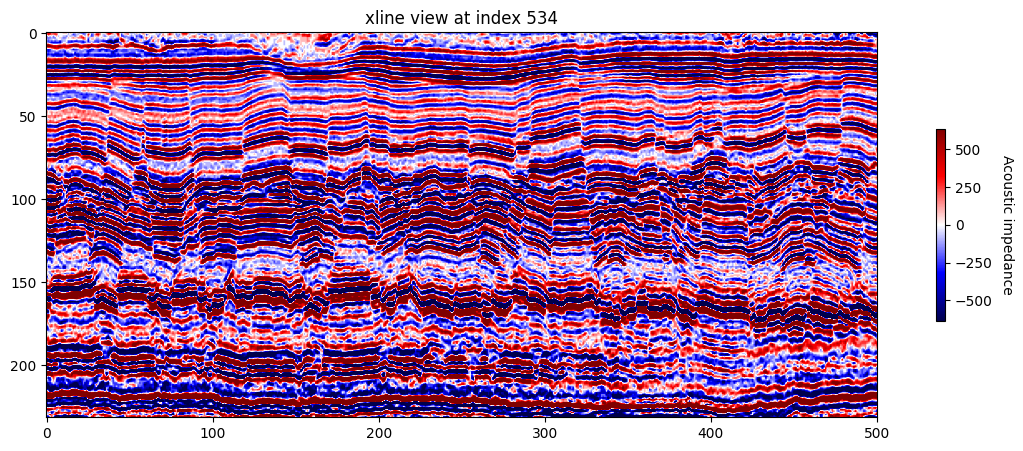

In [11]:
xline_idx = 1600 - xline_start
plot_seismic_slice(data, "xline", xline_idx)

Observations:
* Again we can see many faults, interrupting the vertical aggredations.
* Additionally, at around 1760 inline, there appears a depression containing acoustic transparency (mixture of different mediums). This could be a mass transport deposit, however without further context we can't be confident.

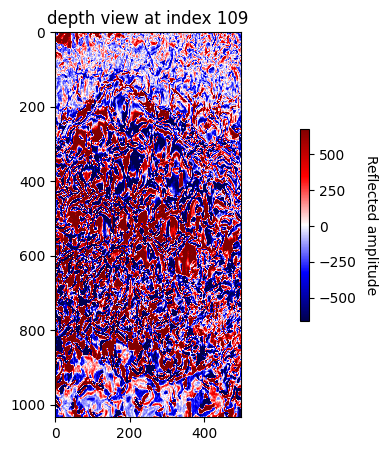

In [94]:
t_idx = math.ceil((1800 - t0) / dt)
plot_seismic_slice(data, "depth", t_idx)

Observations:
* We can observe clear contrasts in reflected amplitude. Moving forward we can make use of seismic attributes, particularly coherence. Which measure how similar seismic traces are to each other, highlighting discontinuities between traces.  

**Question 5**: What seismic attributes could you use to better highlight the geological feature you identified in Question 4? We would like to learn how these attributes work. Please calculate two seismic attributes of your choice to help better image this geological feature for time slice 1800 ms- which seismic attribute do you think works the best and why? (text, code,figures) (max. 300 words)

In [125]:

def moving_window(data: np.ndarray, window_size: tuple[int, int, int], func: Callable) -> np.ndarray:
    wrapped: Callable = lambda region: func(region.reshape(window_size))
    return scipy.ndimage.generic_filter(input=data, function=wrapped, size=window_size)

def marfurt_semblance(region: np.ndarray) -> np.ndarray:
    region = region.reshape(-1, region.shape[-1])
    ntraces, nsamples = region.shape

    square_of_sums = np.sum(region, axis=0)**2
    sum_of_squares = np.sum(region**2, axis=0)
    sembl = square_of_sums.sum() / sum_of_squares.sum()
    return sembl / ntraces

In [126]:
idx = 108
s = 8
marfurt = moving_window(data[:,:,idx - s:idx + s], (3, 3, 9), marfurt_semblance)

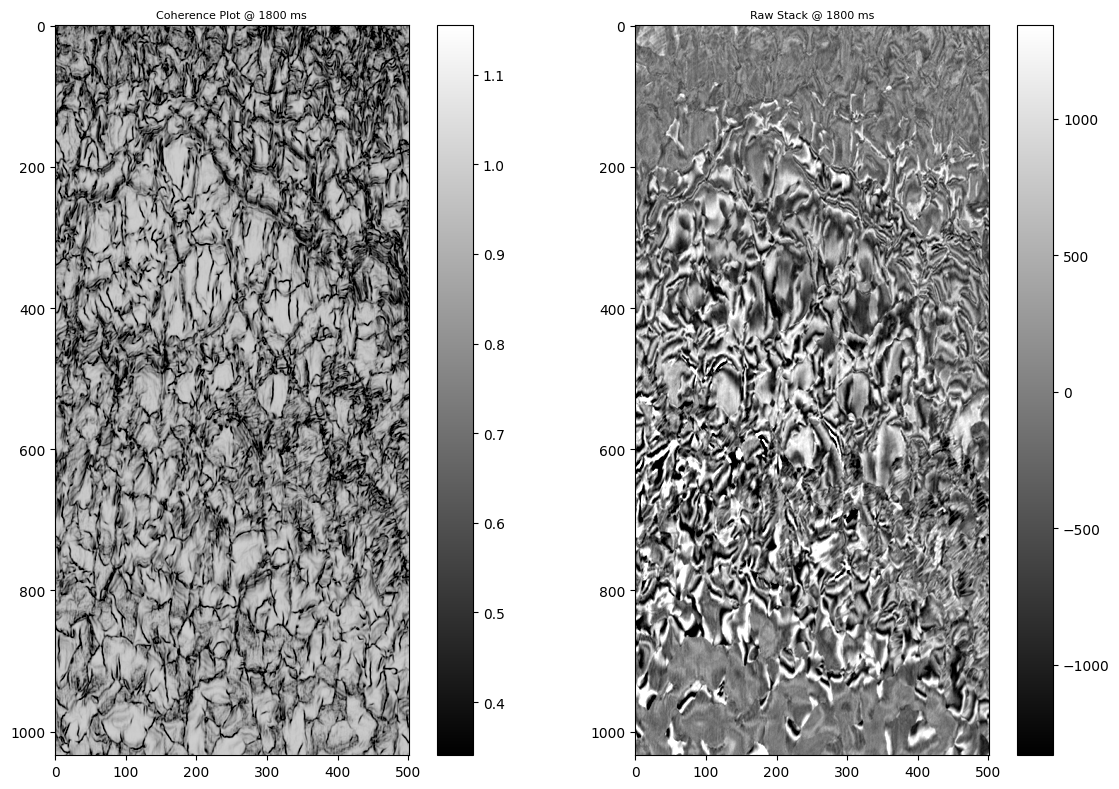

In [127]:
s = 1
 
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
 
# coherence slice
mu = np.mean(marfurt[:, :, s])
sigma = np.std(marfurt[:, :, s])
 
obj = axs[0].imshow(marfurt[:, :, s].T, cmap='gray', vmin=mu-2*sigma, vmax=mu+2*sigma)
axs[0].set_title('Coherence Plot @ 1800 ms', fontsize=8)
fig.colorbar(obj, ax=axs[0], shrink=1)
 
raw_slice = data[:,:,idx-s:idx+s][:, :, s]
 
mu_r = np.mean(raw_slice)
sigma_r = np.std(raw_slice)
 
obj = axs[1].imshow(raw_slice.T, cmap='gray', vmin=mu_r-2*sigma_r, vmax=mu_r+2*sigma_r)
axs[1].set_title('Raw Stack @ 1800 ms', fontsize=8)
fig.colorbar(obj, ax=axs[1], shrink=1)
 
fig.tight_layout()

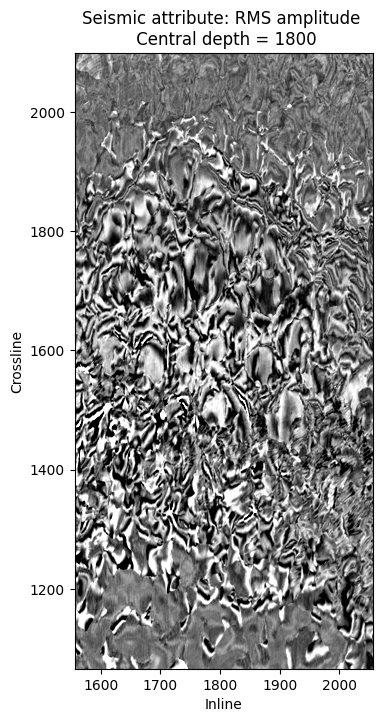

In [100]:
RMS = np.zeros(data.shape)
 
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        trace = data[i,j,:]
       
        # Get RMS values
        trace_sq = np.square(trace) # square
        kernel = np.ones(11)/11 # range over which we take the RMS value
       
        # complete RMS calc
        RMS_amp = np.sqrt(np.convolve(trace_sq, kernel, 'same'))
       
        #store results
        RMS[i,j,:] = RMS_amp
        
        
fig = plt.figure(figsize=(10,8))
boundary = [inlines[0], inlines[-1], xlines[0], xlines[-1]]
section = 1800
 
idx = np.where(depth == section)[0][0]
data_slice = data[:,:,idx]
 
x_label = 'Inline'
y_label = 'Crossline'
 
vmax = np.percentile(data[:,:,idx], 95)
vmin = np.percentile(data[:,:,idx], 5)
 
plt.imshow(data_slice.T, extent = boundary, cmap='gray', vmin=vmin, vmax=vmax)
 
plt.title('Seismic attribute: RMS amplitude \n Central depth = ' + str(section))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

#### Answer 5: Seismic attributes

Given the number of faults present in different orientations, many different attribute analysis could potentially highlight these. Due to the significant and abrupt changes in trace amplitudes where there are discontinuities. As we are examining a time slice, where faults are poorly imaged in the raw seismic image, partly due to interference/noise with other reflections, the use of attributes are important to help visualise features. Amplitude based attributes, for example amplitude RMS, would highlight the faults as it delineates map-view distributions of amplitude anomalies. This would effectively show changes between time slices, which we would expect to see due to amount and orientation of the faults. Geometric attribute, such as coherency (here using Marfurt semblance), should also highlight the presence and shape of faults more distinctly. 

We believe the coherency attribute works best and you can see it shows the polygonal nature of the faults really clearly. This is because it specifically highlights similarity across the slice, and given faults are very discontinuous features they show much more clearly. The kernel for the Marfurt semblance calculation considers all 3 dimensions which could be a possible reason for the more physical representation (smoothing and noise reduction), highlighting the amplitude discrepancies and improving the signal-to-noise ratio. 


**Question 6**: Is there anything else you would like to show us/tell us to convince us that seismic data is the right dataset for us? In your view, how might the way we interpret seismic data change in the future?  (text,figures)(max 300 words)

* Seismic data provides high resolution mapping the subsurface landscape.
* Including highlighting subtle geological edges such as faults and fractures in surfaces.
* Being able to perform detailed analysis is a benefit of this high resolution data. 

* Seismic data is massive, in three dimensions and covering large land mass. Observing patterns and extracting information is time-consuming and subjective. It's not feasible for human analysts (and even super computers) to study the vast swathes of data available.
* As a result, massive parallel computational methods designed for processing big data can help such as neural networks, revolutionise the processing methods to extract meaningful information.  
* By automating preprocessing and aiding with seismic interpretation i.e. identifying areas of high geological feature density, we can shift the focus for geologists away from menial to more specialised tasks.  

--------------

### Below you can find three examples of the question format that will be used for the assessed quiz on 26th Feb. Please answer these questions as a team and I will give you feedback.

### 1)	Which of the following seismic sources would be the best to explore for unexploded ordnance a few meters below the seabed in shallow water:

#### a)	Airguns
#### b)	Vibroseis
#### c)	Dynamite
#### d)	Pingers


pingers

### 2)	………….. are used to receive seismic signals in land surveys (fill in the missing word)



geophones

### 3)	What is the best definition of the coherency attribute:
#### a)	It is a seismic attribute that measures root mean squared amplitude to determine how similar seismic traces are
#### b)	It is a machine learning method that extracts seismic traces that have similar wavelet shape 
#### c)	It is a seismic attribute that measures the similarity between seismic traces
#### d)	It is a seismic attribute that measures the discontinuity between seismic traces


c)

Perhaps one of the best things you can do it 'revise' is to remind yourself of which topics are covered in which lecture so you can look things up if you need to (the exam will be open book)